In [2]:
%%capture

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from healpy.sphtfunc import smoothing
import smica
import os
import json

import copy
from astropy.io import fits
from scipy import interpolate
import matplotlib.pyplot as plt

import healpy as hp
from component_separation.io import IO
import component_separation.smica_interface as smint
import component_separation.covariance as cv
import component_separation.powerspectrum as pospec

from component_separation.cs_util import Config
from component_separation.cs_util import Smica_bins as const
from component_separation.cs_util import Helperfunctions as hpf

from component_separation.cs_util import Filename_gen as fn_gen
from component_separation.cs_util import Filename_gen_SMICA as fns_gen

csu = Config()
fn = fn_gen(csu)
fns = fns_gen(csu)
io = IO(csu)

In [4]:
info_component = 'foreground'
info_combination = 'combined'
powerspectrum_type = 'Chonetal'
represent = 'Dl'
tst = fn_gen(csu).get_spectrum(info_component, info_combination, represent, sim_id=100)
print(20*'=')
print(tst)
print(20*'=')

/global/cscratch1/sd/sebibel/compsep/NPIPE/smicamask/sim100/smicasep-foreground/spec/Dl_SMICA_highell_bins_combined_2048_4000_pseudo_100.npy


In [35]:
Cl_tot = io.load_data(fn.get_spectrum("T", "non-separated"))
covl_tot = cv.build_covmatrices(Cl_tot, "K_CMB", csu.freqcomb, csu.PLANCKMAPFREQ_f, cutoff=1400)

loaded /global/cscratch1/sd/sebibel/compsep/DX12/smicamask/ClT_non-separated_2048_4000_pseudo.npy


In [36]:
covl_tot = pospec.cov2cov_smooth(covl_tot, cutoff=1400)

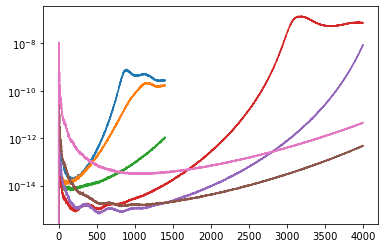

In [37]:
for n in range(7):
    plt.plot(covl_tot[1,n,n,:])
plt.yscale('log')

In [38]:
weights_tot = cv.cov2weight(covl_tot, freqs=csu.PLANCKMAPFREQ_f, Tscale="K_CMB")
print(weights_tot.shape)

(6, 7, 4001)


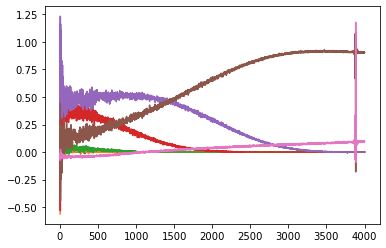

In [39]:
for n in range(7):
    plt.plot(weights_tot[1,n,:])

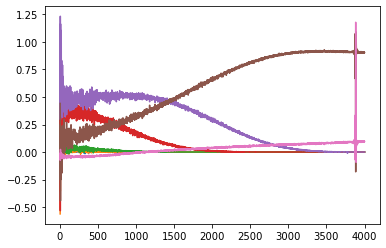

In [39]:
for n in range(7):
    plt.plot(weights_tot[1,n,:])

In [43]:
fns.get_map('T', 'combined')

'/global/cscratch1/sd/sebibel/compsep/DX12/smicamask/MapT_combined_SMICA_highell_bins_2048_4000_pseudo.npy'

In [3]:
pdata = fits.open('/project/projectdirs/pico/data_xx.yy/90.91/pico_90p91_comb_AL0p15_f090_b10_ellmin00_map_0512_mc_0076.fits')

In [8]:
pdata[1].data.field(0).shape

(3145728,)

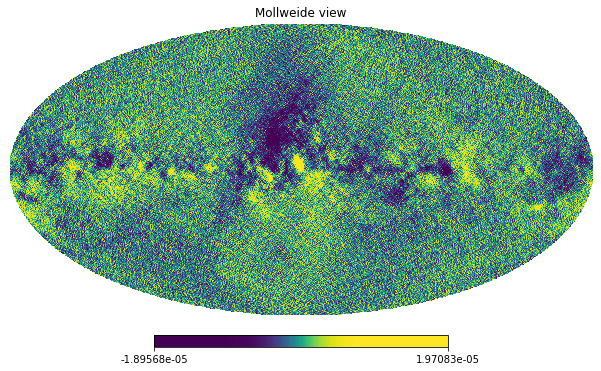

In [13]:
hp.mollview(pdata[1].data.field(2), norm='hist')